In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install tensorflow==1.15.0 

In [ ]:
#!pip install keras==2.2.4  

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
import keras
print(keras.__version__)

2.5.0


In [4]:
pip install bnltk

In [5]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2MB 9.8MB/s 
     |████████████████████████████████| 23.9MB 138kB/s 
     |████████████████████████████████| 747kB 39.6MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [6]:
from bnlp import BasicTokenizer

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
pip install chart_studio

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bnltk
from bnltk.stemmer import BanglaStemmer
from bnltk.tokenize import Tokenizers
t = Tokenizers()

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)
from chart_studio import plotly
import plotly.graph_objs as go
import plotly

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras import backend as K

#from keras.engine import Layer, InputSpec, InputLayer

from keras.models import Model, Sequential

from keras.layers import Dropout, Embedding, concatenate
from keras.layers import Conv1D, MaxPool1D, Conv2D, MaxPool2D, ZeroPadding1D
from keras.layers import Dense, Input, Flatten, BatchNormalization
from keras.layers import Concatenate

from tensorflow.keras.layers import Reshape
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, MaxPool1D, Conv2D, MaxPool2D, ZeroPadding1D 
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import SimpleRNN, LSTM, GRU, Lambda, Permute
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers.wrappers import TimeDistributed
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import LSTM
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras import backend as K
from pickle import load
#from keras.utils import to_categorical
from tensorflow.python.keras.metrics import Metric
from tensorflow.keras import layers
from tensorflow.keras import losses
import numpy as np
from numpy import array
from keras.layers import concatenate
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Input
import sklearn.metrics as metrics

In [12]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [13]:
excel_data_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Cricket_Updated.xlsx', sheet_name='Sheet1', usecols=['Text', 'BTSC_Positive', 'BTSC_Negative', 'BTSC_Neutral'], dtype={'Text': str})
excel_data_df.head(10)

,Text,BTSC_Positive,BTSC_Negative,BTSC_Neutral
0,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,1,0,0
1,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,1,0,0
2,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?।,1,0,0
3,সৌম্যকে বাদ দেওয়া হোক।,0,1,0
4,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",1,0,0
5,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",1,0,0
6,মুসফিক আর তামিমের বেটিং তান্ড়বে কুহিলির জিব্ব...,0,1,0
7,সত্যি সত্যিই ছিলো বাঘ আমাদেরই চাপে হয়ে গেলো ব...,0,1,0
8,বাংলাদেশ জিতবে ইনশা আল্লাহ।,1,0,0
9,"ক্রিকেটে ভারত একটা অসভ্য দল,বিরাট কোহলির আচরনে...",0,1,0


In [14]:
dataset = excel_data_df["Text"].values
y  = excel_data_df[["BTSC_Positive", "BTSC_Negative", "BTSC_Neutral"]].values

In [15]:
dataset.size

2979

In [ ]:
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [16]:
corpus = excel_data_df['Text'].tolist()
corpus[2978]

'টিম মেনেজমেন্ট থেকে শুরু করে সবাইকে গাজার পরিবর্তে অাফিম দেওয়া প্রয়োজন... যাতে নেশা হলে ও মস্তিষ্কটা নিয়ন্ত্রণে থাকে.....ফালতু সব গাজাখুড়ি বাহানা।'

In [17]:
with open ("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/stopWordModel.txt", encoding='utf8') as myfile:
  listOfStopWord = myfile.read().splitlines()

In [18]:
with open ("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Pretrained Word2Vector/Dataset/special letters.txt", encoding='utf8') as myfile:
  SpecialLetters = myfile.read().splitlines()

In [19]:
## ADD two list 
mergedlistofStopWords = []
mergedlistofStopWords.extend(SpecialLetters)
mergedlistofStopWords.extend(listOfStopWord)

In [ ]:
mergedlistofStopWords[:20]

In [20]:
basic_tokenizer = BasicTokenizer()
Sequence_list = []
sentecnceList = []
listOfTotalSentence_list = []
resultToken = ""
sentence = ""

for i in range(0, len(corpus)):
  extractToken = basic_tokenizer.tokenize(corpus[i])
  resultToken = [k for k in extractToken if k not in mergedlistofStopWords]
  #print(extractToken)
  listOfTotalSentence_list.append(resultToken)
  for token in resultToken:
      sentence = sentence + " " + token
  Sequence_list.append(sentence)
  sentence = ""

In [ ]:
Sequence_list[:10]

[' জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকার আইডিয়া এসেছে তালে স্যালুট',
 ' জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকার আইডিয়া এসেছে তালে স্যালুট',
 ' বাংলাদেশের ভারতের সাপর্ট',
 ' সৌম্যকে বাদ দেওয়া',
 ' প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা',
 ' প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা',
 ' মুসফিক তামিমের বেটিং তান্ড়বে কুহিলির জিব্বহাটা শুকিয়ে গেছেরে গরুর মুত খাওয়ার',
 ' সত্যি সত্যিই বাঘ আমাদেরই চাপে গেলো বেড়াল',
 ' বাংলাদেশ জিতবে ইনশা আল্লাহ',
 ' ক্রিকেটে ভারত অসভ্য দল বিরাট কোহলির আচরনে স্পষ্ট ফুটে উঠে']

In [ ]:
listOfTotalSentence_list[:10]

In [ ]:
dataset[0]

'জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।'

In [ ]:
listOfTotalSentence_list[0]

['জয়',
 'বাংলা',
 'কাপ',
 'স্বাধীনতার',
 'মাস',
 'মার্চে',
 'মাথা',
 'চমৎকার',
 'আইডিয়া',
 'এসেছে',
 'তালে',
 'স্যালুট']

In [21]:
for i in range(0, len(Sequence_list)):
  #print(listOfTotalSentence[i][0])
  dataset[i] = Sequence_list[i]

In [ ]:
dataset[0]

' জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকার আইডিয়া এসেছে তালে স্যালুট'

In [ ]:
#listOfTotalSentence[0][0]

In [ ]:
listOfTotalSentence_list[:10]

In [22]:
def FindMaxLength_Of_ListOfList(lst):
  maxList = max((x) for x in lst)
  maxLength = max(len(x) for x in lst )
  
  return maxList, maxLength
      
print(FindMaxLength_Of_ListOfList(listOfTotalSentence_list))

(['🎊', 'তামিম', 'ইকবাল', 'খান', 'জানতাম', 'আজকে', '৫০', 'রান'], 23)


In [23]:
num_words = 6570 #Max. workds to use per toxic comment
max_len = 40 #Max. number of words per toxic comment to be use

num_words = 10000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
#max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 50 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.10, random_state=42)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train[:10]

array([' নতু পুরাতন ভালো পারফরমেন্স দলে ফিরাতেই',
       ' রাজ্জাকের অভিজ্ঞ বোলারকে বাদ দিয়েছিলো জঘন্য কোচ হাতুরি',
       ' ক্রিকেট খেলা ছেড়ে পিছনে খরচ বরন্চ দারিদ্র বেকারত্ব দূর প্রকল্প নেয়া হোকলো',
       ' পরাজয়ের ব্যবধান সেদিকে লক্ষ্য রাখা',
       ' ঘরোয়া লীগ খেলে টাকা পায় জাতীয় দলে খেলেও টাকা পায় কেনো বেতন বাড়াবে',
       ' প্রিয় খেলোয়ার', ' বাংলাদেশ দলে পারফরম্যান্স দাম',
       ' বাংলাদেশের চিন্তা বাদ দাও ত্রি দেশীয় সিরিজে ৮৩ ফাইনালে হেরে মাথা পুরোটাই উত্তেজিত দিছে',
       ' স্কুল ক্রিকেট দূরে থাক জাতীয় দলের মিরপুর ভেন্যুই চিনেননা অাপনারা ঘরোয়া লীগে পিকনিক বিকেএসপি',
       ' এলাহিকান্ড ঘটিয়েছেন তামিম ইমরুল মুশি মিমি'], dtype=object)

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [26]:
#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train

[[2402, 1348, 4, 574, 6, 2403],
 [43, 344, 727, 18, 1349, 397, 20, 251],
 [3, 7, 295, 475, 952, 2404, 2405, 2406, 1350, 2407, 112, 2408],
 [2409, 953, 1351, 2410, 57],
 [205, 954, 21, 102, 83, 32, 6, 1352, 102, 83, 143, 345, 2411],
 [398, 88],
 [1, 6, 1353, 955],
 [2, 252, 18, 136, 1354, 728, 163, 2412, 253, 108, 206, 2413, 1355, 346],
 [956, 3, 1356, 729, 32, 16, 254, 2414, 2415, 957, 205, 476, 2416, 2417],
 [1357, 1358, 35, 58, 477, 478],
 [347, 42, 37, 207, 144, 1, 255, 575],
 [958, 399, 52, 38],
 [13, 1, 2418, 11, 256, 576, 2419],
 [186, 164, 1359, 2420, 1360, 1361, 21, 730],
 [577, 2421, 1362],
 [2422, 2423, 2424, 2425, 2426, 2427, 137, 1363],
 [1, 16, 31, 39, 959],
 [2428, 2429, 145, 960, 76],
 [46, 296, 961, 109, 1364, 731, 2, 732, 57],
 [1365, 400, 113, 401, 26, 1366, 2430, 297, 1367],
 [2431, 43, 2432, 1368, 1369],
 [12, 2433, 733, 22],
 [734, 257, 348, 962, 479, 208, 165],
 [2434, 1370, 402, 14, 578],
 [33, 2435, 2436, 1371, 123, 963, 54, 2437, 94, 2438, 2439],
 [579, 2440, 4

In [ ]:
X_test

[[51, 386, 481],
 [6108, 9, 66, 1916, 45],
 [7, 174, 791],
 [56, 3478],
 [1547, 1311, 658, 13, 658, 5875, 14],
 [973, 648, 2633, 859, 30, 441, 769, 12, 246],
 [119, 129, 4157, 4156, 886, 25, 519],
 [620, 620, 379, 219, 219, 2184, 381, 401],
 [5, 398, 161],
 [10, 518, 13, 1166, 1572, 211, 1991],
 [5343, 5344, 548, 884, 33, 291, 5345, 242, 5346, 5347, 5348, 712],
 [152, 74, 60, 4, 1140, 4],
 [4, 218, 11, 129, 3432, 5373, 23, 54],
 [183, 2767, 34, 279, 32, 16, 212, 29],
 [],
 [117, 55, 2519, 6, 5340, 1262],
 [179, 7, 1915, 250, 584, 253, 14],
 [705, 50, 25, 5470, 10, 348, 10],
 [],
 [75, 9],
 [3847, 137, 12, 3848, 304],
 [359, 4086, 2289, 973],
 [594, 47, 12, 4820, 159, 10],
 [266, 47, 537, 3796],
 [147, 4],
 [4489, 767, 618, 401, 618, 111, 1734, 4239, 1686],
 [5483, 1898, 504],
 [103, 2147, 26, 125],
 [52, 2, 212, 4631],
 [48, 37, 1135, 1250],
 [186, 572, 5682],
 [187],
 [2697, 1031, 2698, 2699, 40, 1521],
 [5308, 17, 1386],
 [1590, 5582, 42, 897],
 [84, 42, 289, 8, 96, 1005],
 [1202, 48

In [27]:
# padding the sequences
X_train_seq = pad_sequences(X_train, max_len)
X_test_seq  = pad_sequences(X_test,  max_len)

In [ ]:
print(FindMaxLength_Of_ListOfList(X_train))

([6158, 247, 373, 886, 39, 1916, 1336], 23)


In [28]:
MAX_SENTS, col = X_train_seq.shape

In [ ]:
MAX_SENTS

2681

In [ ]:
X_train_seq.shape

(2681, 40)

In [ ]:
y_train.shape

(2681, 3)

In [ ]:
X_test_seq.shape

(298, 40)

In [ ]:
y_test.shape

(298, 3)

### **use cross validation to split arrays or matrices of train data into random train and validation subsets**

In [29]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train_seq, y_train, train_size =0.9, random_state=233)

In [ ]:
y_tra.shape

(2412, 3)

In [ ]:
X_tra.shape

(2412, 40)

In [31]:
print('X_train_seq shape:', X_tra.shape)
print('y_train shape:', y_tra.shape)
print('X_test_seq shape: ', X_test_seq.shape)
print('Y_test shape: ', y_test.shape)
print('X_val shape: ', X_val.shape)
print('Y_val shape: ', y_val.shape)

X_train_seq shape: (2412, 40)
y_train shape: (2412, 3)
X_test_seq shape:  (298, 40)
Y_test shape:  (298, 3)
X_val shape:  (269, 40)
Y_val shape:  (269, 3)


In [ ]:
word_index = tokenizer.word_index
print('Found %s uniquue tokens.' % len(word_index))

Found 6158 uniquue tokens.


In [ ]:
for word, i in word_index.items():
  print(word)

In [ ]:
word_index

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

**Load Word Emmbedding Model From Colab Repository** ---   **`128 Dimension`**

In [ ]:
word2Vec_embeddings_index = {}
word2vec_file = open(os.path.join('', '/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/embedding_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

In [ ]:
##embedding_matrix
word2Vec_embedding_matrix = np.zeros((len(word_index) + 1, embedding_dims))

**Load 128 Dimension Word Embedding**

In [ ]:
for word, i  in word_index.items():
    if i > len(word_index):
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector


In [ ]:
word2Vec_embedding_matrix.shape

(6173, 128)

In [ ]:
num_words = len(word_index) + 1

In [ ]:
print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

#print(word2Vec_embedding_matrix)

6159
6159
128


**Customize Function of important metrices  **

In [ ]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy

def precision(y_true, y_pred):
    #print(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2*((precision_val*recall_val)/(precision_val+recall_val+K.epsilon()))

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

### **Capsule Layer**

In [ ]:
import keras.backend as K
import tensorflow as tf
from keras import initializers, layers


class Length(layers.Layer):
    def call(self, inputs, **kwargs):
        return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]

    def get_config(self):
        config = super(Length, self).get_config()
        return config


class Mask(layers.Layer):
    def call(self, inputs, **kwargs):
        if type(inputs) is list:  # true label is provided with shape = [None, n_classes], i.e. one-hot code.
            assert len(inputs) == 2
            inputs, mask = inputs
        else: 
            x = K.sqrt(K.sum(K.square(inputs), -1))
            mask = K.one_hot(indices=K.argmax(x, 1), num_classes=x.get_shape().as_list()[1])

        masked = K.batch_flatten(inputs * K.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if type(input_shape[0]) is tuple:  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])

    def get_config(self):
        config = super(Mask, self).get_config()
        return config


def squash(vectors, axis=-1):
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm + K.epsilon())
    return scale * vectors


class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3,
                 kernel_initializer='glorot_uniform',
                 **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):
        assert len(input_shape) >= 3, "The input Tensor should have shape=[None, input_num_capsule, input_dim_capsule]"
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # Transform matrix
        self.W = self.add_weight(shape=[self.num_capsule, self.input_num_capsule,
                                        self.dim_capsule, self.input_dim_capsule],
                                 initializer=self.kernel_initializer,
                                 name='W')

        self.built = True

    def call(self, inputs, training=None):
        
        inputs_expand = tf.expand_dims(inputs, 1)
        inputs_tiled  = tf.tile(inputs_expand, [1, self.num_capsule, 1, 1])
        inputs_tiled  = tf.expand_dims(inputs_tiled, 4)

        inputs_hat = tf.map_fn(lambda x: tf.matmul(self.W, x), elems=inputs_tiled)     

        # Begin: Routing algorithm ----------------------------------------------#
        
        b = tf.zeros(shape=[tf.shape(inputs_hat)[0], self.num_capsule, 
                            self.input_num_capsule, 1, 1])

        assert self.routings > 0, 'The routings should be > 0.'
        for i in range(self.routings):
         
          c = layers.Softmax(axis=1)(b)

          outputs = tf.multiply(c, inputs_hat)
          outputs = tf.reduce_sum(outputs, axis=2, keepdims=True)
          outputs = squash(outputs, axis=-2)  # [None, 10, 1, 16, 1]

          if i < self.routings - 1:
            outputs_tiled = tf.tile(outputs, [1, 1, self.input_num_capsule, 1, 1])
            agreement = tf.matmul(inputs_hat, outputs_tiled, transpose_a=True)
            b = tf.add(b, agreement)

        # End: Routing algorithm ------------------------------------------------#
        
        outputs = tf.squeeze(outputs, [2, 4])
        return outputs

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])

    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings
        }
        base_config = super(CapsuleLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


def PrimaryCap(inputs, dim_capsule, n_channels, kernel_size, strides, padding, name):
    output = layers.Conv1D(filters=dim_capsule * n_channels, kernel_size=kernel_size, strides=strides, padding=padding, name=name)(inputs)
    outputs = layers.Reshape(target_shape=[-1, dim_capsule])(output)
    return layers.Lambda(squash)(outputs)

In [ ]:
from tensorflow.keras.layers import LeakyReLU, Dense, Input, Embedding, Dropout, Bidirectional, GRU, Flatten, SpatialDropout1D

In [ ]:
from keras import layers, models

n_class = 3
gru_len = 256
Routings = 3
Num_capsule = 10
Dim_capsule = 16
dropout_p = 0.2
rate_drop_dense = 0.2

max_len = 40
embed_size = word2Vec_embedding_matrix.shape[1]


inputs = Input(shape=(max_len,))
embed_layer = Embedding(word2Vec_embedding_matrix.shape[0], embed_size, input_length=max_len, weights=[word2Vec_embedding_matrix])(inputs)
embed_layer = SpatialDropout1D(rate_drop_dense)(embed_layer)

x = Bidirectional(LSTM(gru_len, activation='relu', dropout=dropout_p, recurrent_dropout=dropout_p, return_sequences=True))(embed_layer)

#digitcaps = CapsuleLayer(num_capsule=n_class, dim_capsule=16, routings=routings,name='digitcaps')(primarycaps)

capsule = CapsuleLayer(num_capsule=Num_capsule, dim_capsule=Dim_capsule, routings=Routings, name='capsule')(x)

capsule = Flatten()(capsule)
capsule = Dropout(dropout_p)(capsule)
capsule = LeakyReLU()(capsule)

x = Flatten()(x)
predictions = Dense(3, activation='sigmoid')(x)


In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)
optimizer =Adam(0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', precision, recall, f1_score, tf.keras.metrics.AUC()])

In [ ]:
model.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 40)]              0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 40, 128)           788352    
_________________________________________________________________
spatial_dropout1d_23 (Spatia (None, 40, 128)           0         
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 40, 512)           788480    
_________________________________________________________________
flatten_47 (Flatten)         (None, 20480)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 61443     
Total params: 1,638,275
Trainable params: 1,638,275
Non-trainable params: 0
________________________________________________

In [ ]:
capsule_Word2Vec_model_fit = model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Epoch 1/50
10/10 [==============================] - 12s 480ms/step - loss: 0.6368 - accuracy: 0.6476 - precision: 0.5904 - recall: 0.7254 - f1_score: 0.6424 - auc: 0.7554 - val_loss: 0.5626 - val_accuracy: 0.6803 - val_precision: 0.7225 - val_recall: 0.7225 - val_f1_score: 0.7225 - val_auc: 0.7724
Epoch 2/50
10/10 [==============================] - 4s 353ms/step - loss: 0.5344 - accuracy: 0.7062 - precision: 0.7059 - recall: 0.7059 - f1_score: 0.7059 - auc: 0.7868 - val_loss: 0.5269 - val_accuracy: 0.6803 - val_precision: 0.7225 - val_recall: 0.7225 - val_f1_score: 0.7225 - val_auc: 0.7791
Epoch 3/50
10/10 [==============================] - 4s 371ms/step - loss: 0.5107 - accuracy: 0.7087 - precision: 0.7080 - recall: 0.7080 - f1_score: 0.7080 - auc: 0.7974 - val_loss: 0.5147 - val_accuracy: 0.6803 - val_precision: 0.7225 - val_recall: 0.7225 - val_f1_score: 0.7225 - val_auc: 0.7897
Epoch 4/50
10/10 [==============================] - 3s 333ms/step - loss: 0.5070 - accuracy: 0.6976 - pre

In [ ]:
 plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/Capsule Network/model.png', show_shapes=True)

In [ ]:
#Evaluate the CNN+Word2Vec Model accuracy of our trained model
capsule_Word2Vec_train_score = model.evaluate(X_train_seq, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', capsule_Word2Vec_train_score[0])
print('Train Accuracy:', capsule_Word2Vec_train_score[1])
print('Train Precesion:', capsule_Word2Vec_train_score[2])
print('Train Recall', capsule_Word2Vec_train_score[3])
print('Train F1-Score', capsule_Word2Vec_train_score[4])
print('Train AUC', capsule_Word2Vec_train_score[5])

11/11 [==============================] - 1s 52ms/step - loss: 0.3756 - accuracy: 0.8297 - precision: 0.7629 - recall: 0.7332 - f1_score: 0.7477 - auc_1: 0.9033
Train Loss: 0.3756396174430847
Train Accuracy: 0.8297202754020691
Train Precesion: 0.7629355788230896
Train Recall 0.7332098484039307
Train F1-Score 0.7477519512176514
Train AUC 0.9033976793289185


In [ ]:
#Evaluate the CNN+Word2Vec accuracy base our test samples
capsule_Word2Vec_test_score = model.evaluate(X_test_seq, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', capsule_Word2Vec_test_score[0])
print('Test Accuracy:', capsule_Word2Vec_test_score[1])
print('Test Precesion:', capsule_Word2Vec_test_score[2])
print('Test Recall', capsule_Word2Vec_test_score[3])
print('Test F1-Score', capsule_Word2Vec_test_score[4])
print('Test AUC', capsule_Word2Vec_test_score[5])


2/2 [==============================] - 0s 46ms/step - loss: 0.4133 - accuracy: 0.8082 - precision: 0.8100 - recall: 0.7305 - f1_score: 0.7544 - auc_1: 0.8748
Train Loss: 0.4133673906326294
Train Accuracy: 0.8082550239562989
Train Precesion: 0.8100911664962769
Train Recall 0.7305617332458496
Train F1-Score 0.7544994354248047
Train AUC 0.8748142719268799


In [ ]:
0.7382550239562988 + 0.07

0.8082550239562989

In [ ]:
#Predicting......
print('Predicting....')
y_pred = model.predict(X_test_seq,batch_size=batch_size2,verbose=1)

Predicting....
2/2 [==============================] - 0s 37ms/step


In [ ]:
y_test[:12]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [ ]:
y_pred[:12]

array([[0.43036184, 0.7426063 , 0.2412828 ],
       [0.43013525, 0.7441031 , 0.23970789],
       [0.43051326, 0.7423978 , 0.24159758],
       [0.43043083, 0.7421633 , 0.24173252],
       [0.42994466, 0.7444223 , 0.23928532],
       [0.43009552, 0.7449555 , 0.23881201],
       [0.42992023, 0.7451749 , 0.23854835],
       [0.43009257, 0.7444319 , 0.23931026],
       [0.4304105 , 0.7423718 , 0.2415225 ],
       [0.43004608, 0.74500036, 0.23877484],
       [0.42975104, 0.7460575 , 0.23752442],
       [0.43015653, 0.7439327 , 0.23991399]], dtype=float32)

In [ ]:
predict_results = y_pred.argmax(axis=1)

In [ ]:
predict_results.shape

(596,)

In [ ]:
predict_results[:12]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test_results = y_test.argmax(axis=1)

In [ ]:
y_test_results

In [ ]:
type(y_test_results)

numpy.ndarray

In [ ]:
predict_results.tolist()

In [ ]:
y_test_results.tolist()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_results.tolist(),predict_results.tolist()))

              precision    recall  f1-score   support

           0       0.42      0.52      0.46        56
           1       0.81      0.84      0.83       220
           2       1.00      0.09      0.17        22

    accuracy                           0.72       298
   macro avg       0.75      0.48      0.49       298
weighted avg       0.75      0.72      0.71       298



**Using Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate our model**

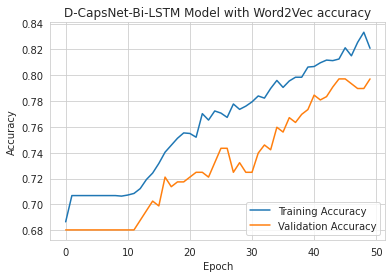

In [ ]:
#Plot Training & Validation Accuracy with the Loss values of the CNN-Word2Vec Model
# Plot training & validation accuracy values
plt.plot(capsule_Word2Vec_model_fit.history['accuracy'])
plt.plot(capsule_Word2Vec_model_fit.history['val_accuracy'])
plt.title('D-CapsNet-Bi-LSTM Model with Word2Vec accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

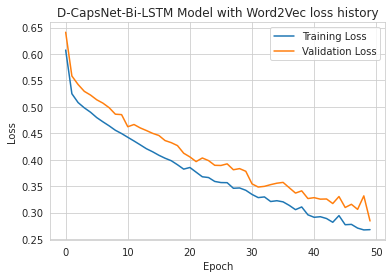

In [ ]:
# Plot training & validation loss values
plt.plot(capsule_Word2Vec_model_fit.history['loss'])
plt.plot(capsule_Word2Vec_model_fit.history['val_loss'])
plt.title('D-CapsNet-Bi-LSTM Model with Word2Vec loss history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()
